In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


데이터를 불러온다.

In [46]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

불러온 데이터를 확인해본다.

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train.shape

(891, 12)

### missing value(결측치)가 존재 여부 확인  
'Age', 'Cabin', 'Embarked'에 missing value가 존재하는 것을 알 수 있다.  
(특히, 'Cabin'에 결측치가 많음)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


데이터 시각화를 통해 데이터 셋을 이해해보도록 한다.

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

feature에 따른 생존 여부 차트를 그려주는 함수를 만들어본다.

In [51]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

### 성별에 따른 생존 여부
남성이 사망률이 높은 것을 알 수 있다.

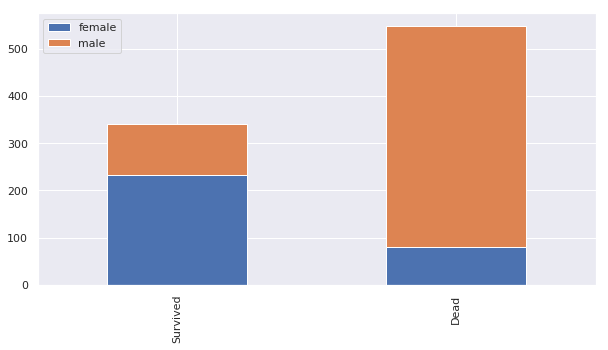

In [52]:
bar_chart('Sex')

### 좌석 등급에 따른 생존 여부
3등석이 사망률이 높은 것을 알 수 있다.

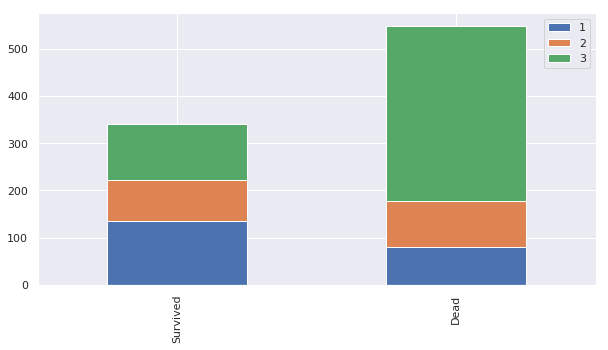

In [53]:
bar_chart('Pclass')

### 가족 수에 따른 생존 여부
혼자 탑승한 승객이 사망률이 높은 것을 알 수 있다.

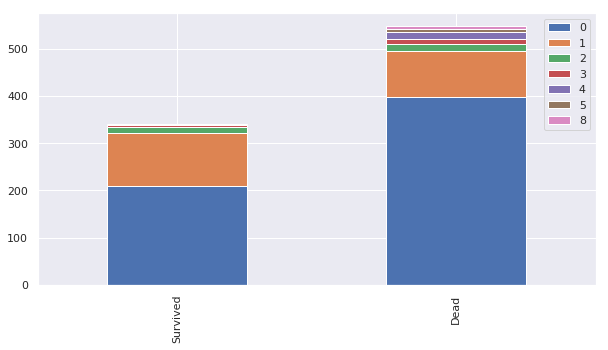

In [54]:
bar_chart('SibSp')

### 탑승 지역에 따른 생존 여부
Southampton에서 탑승한 승객이 사망률이 높은 것을 알 수 있다.

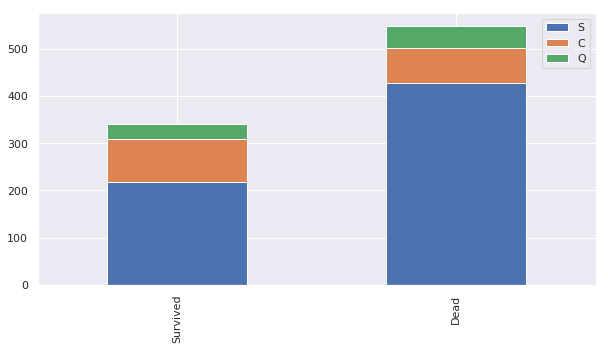

In [55]:
bar_chart('Embarked')

### 데이터 전처리

train 데이터와 test 데이터를 합친다.

In [56]:
train_test = [train, test]

In [57]:
train_test

[     PassengerId  Survived  Pclass    ...         Fare        Cabin  Embarked
 0              1         0       3    ...       7.2500          NaN         S
 1              2         1       1    ...      71.2833          C85         C
 2              3         1       3    ...       7.9250          NaN         S
 3              4         1       1    ...      53.1000         C123         S
 4              5         0       3    ...       8.0500          NaN         S
 5              6         0       3    ...       8.4583          NaN         Q
 6              7         0       1    ...      51.8625          E46         S
 7              8         0       3    ...      21.0750          NaN         S
 8              9         1       3    ...      11.1333          NaN         S
 9             10         1       2    ...      30.0708          NaN         C
 10            11         1       3    ...      16.7000           G6         S
 11            12         1       1    ...      26.5

Name 데이터에서 이름 자체는 큰 의미가 없으나 'Mr', 'Mrs', 'Miss' 등은 결혼유무 등을 알 수 있는 중요한 정보가 될 수 있다.  
따라서 해당 타이틀만 추출한다.

In [58]:
for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [59]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Countess      1
Don           1
Capt          1
Sir           1
Mme           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [60]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

추출된 타이틀을 유사관계에 따라 mapping해준다.

- Mr : 0
- Miss : 1
- Mrs : 2
- Others : 3

In [63]:
for dataset in train_test:
    dataset['Title'] = dataset['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':3, 'Rev':3, 'col':3, 'Major':3, 'Mlle':3, 
                                            'Jonkheer':3, 'Capt':3, 'Mme':3, 'Don':3, 'Lady':3, 'Ms':3, 'Sir':3, 'Countess':3})

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
